In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# **EDA**

In [2]:
df = pd.read_csv('Training.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   int64  
 2   BloodPressure             2460 non-null   int64  
 3   SkinThickness             2460 non-null   int64  
 4   Insulin                   2460 non-null   int64  
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 173.1 KB


In [4]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [5]:
df.duplicated().sum()

2000

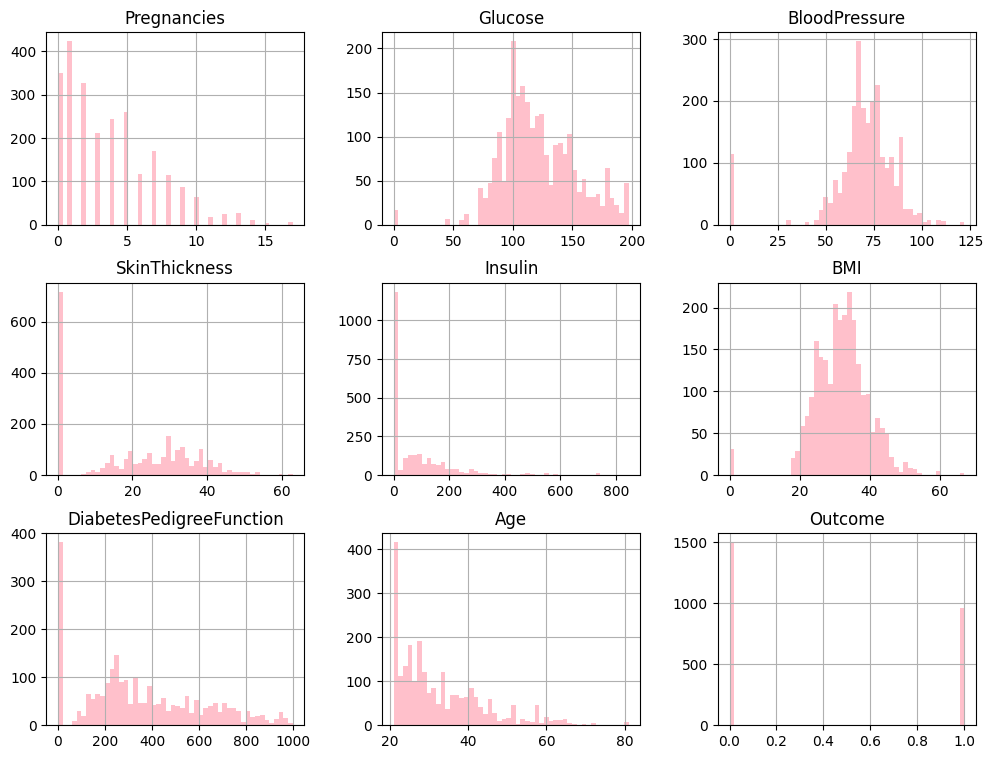

In [23]:
df.hist(bins=50, figsize=(12,9), color='pink');

In [7]:
def outlier(data):
  columns = df.select_dtypes(include=['int', 'float']).columns
  outlier_counts = {}
  for x in columns:
    Q1 = data[x].quantile(0.25)
    Q3 = data[x].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_count = data[(data[x] < lower_bound) | (data[x] > upper_bound)]
    outlier_counts[x] = len(outlier_count)

  return outlier_counts

outlier_counts = outlier(df)
print(f'jumlah data outlier : {outlier_counts}')

jumlah data outlier : {'Pregnancies': 21, 'Glucose': 17, 'BloodPressure': 140, 'SkinThickness': 0, 'Insulin': 97, 'BMI': 56, 'DiabetesPedigreeFunction': 0, 'Age': 63, 'Outcome': 0}


In [8]:
df.shape

(2460, 9)

In [9]:
def remove_outlier(data):
  columns = df.select_dtypes(include=['int', 'float']).columns
  cleaned_data = data.copy()
  for column in columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]
  return cleaned_data

df_cleaned = remove_outlier(df)

In [10]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2105 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2105 non-null   int64  
 1   Glucose                   2105 non-null   int64  
 2   BloodPressure             2105 non-null   int64  
 3   SkinThickness             2105 non-null   int64  
 4   Insulin                   2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   DiabetesPedigreeFunction  2105 non-null   float64
 7   Age                       2105 non-null   int64  
 8   Outcome                   2105 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 164.5 KB


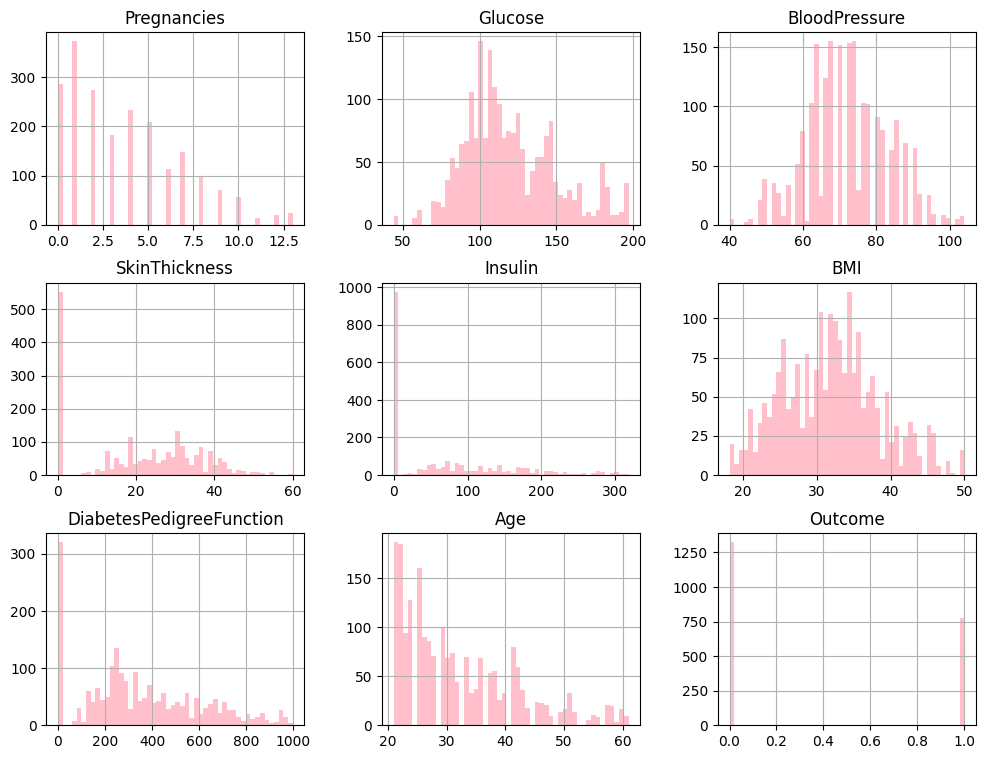

In [22]:
df_cleaned.hist(bins=50, figsize=(12,9), color='pink');

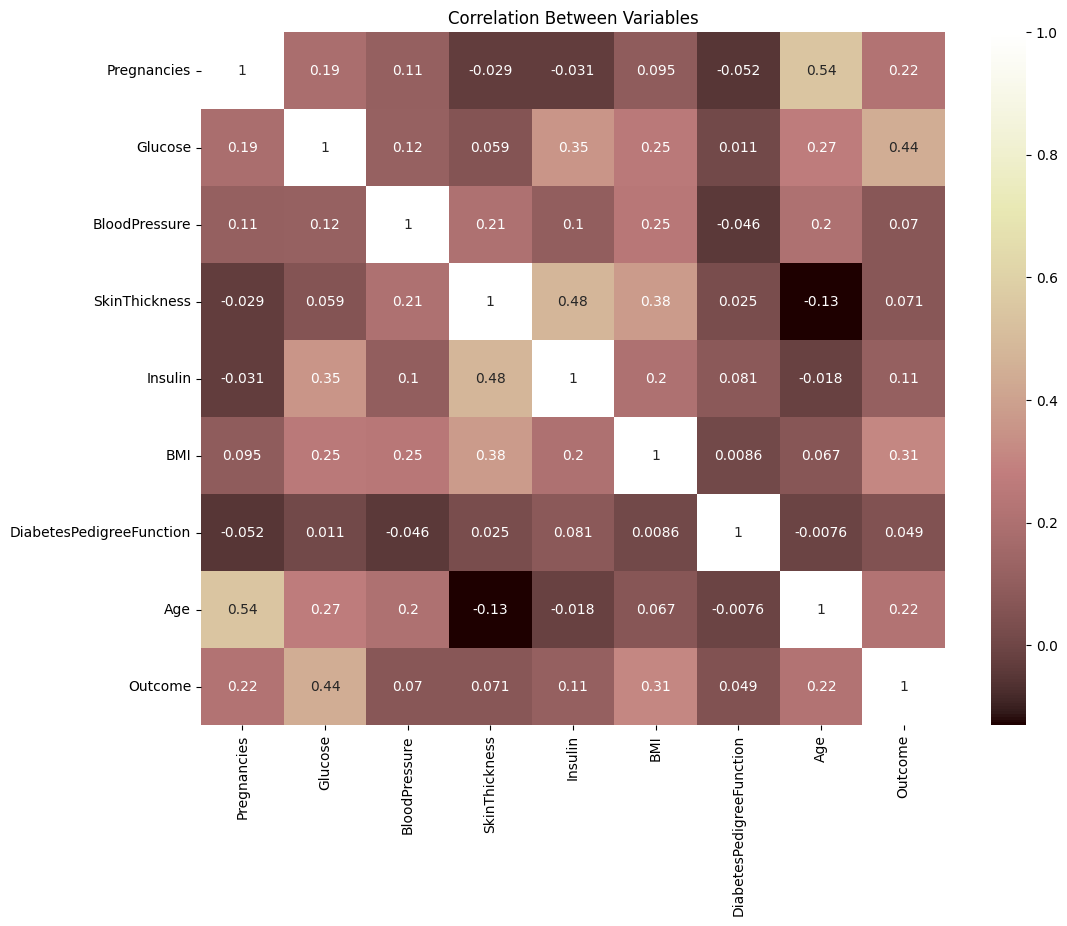

In [21]:
df_numeric = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12,9))
plt.title('Correlation Between Variables')
sns.heatmap(data=df_numeric.corr(), annot=True, cmap='pink')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   int64  
 2   BloodPressure             2460 non-null   int64  
 3   SkinThickness             2460 non-null   int64  
 4   Insulin                   2460 non-null   int64  
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 173.1 KB


(None,
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                   627.000   50        1  
 1                   351.000   31        0  
 2                   672.000   32        1  
 3                   167.000   21        0  
 4                     2.288   33        1  ,
 Pregnancies                  350
 Glucose                       17
 BloodPressure                114
 SkinThickness                717
 Insulin                     1181
 BMI                           31
 DiabetesPedigreeFunction       0
 Age                            0
 Outcome  

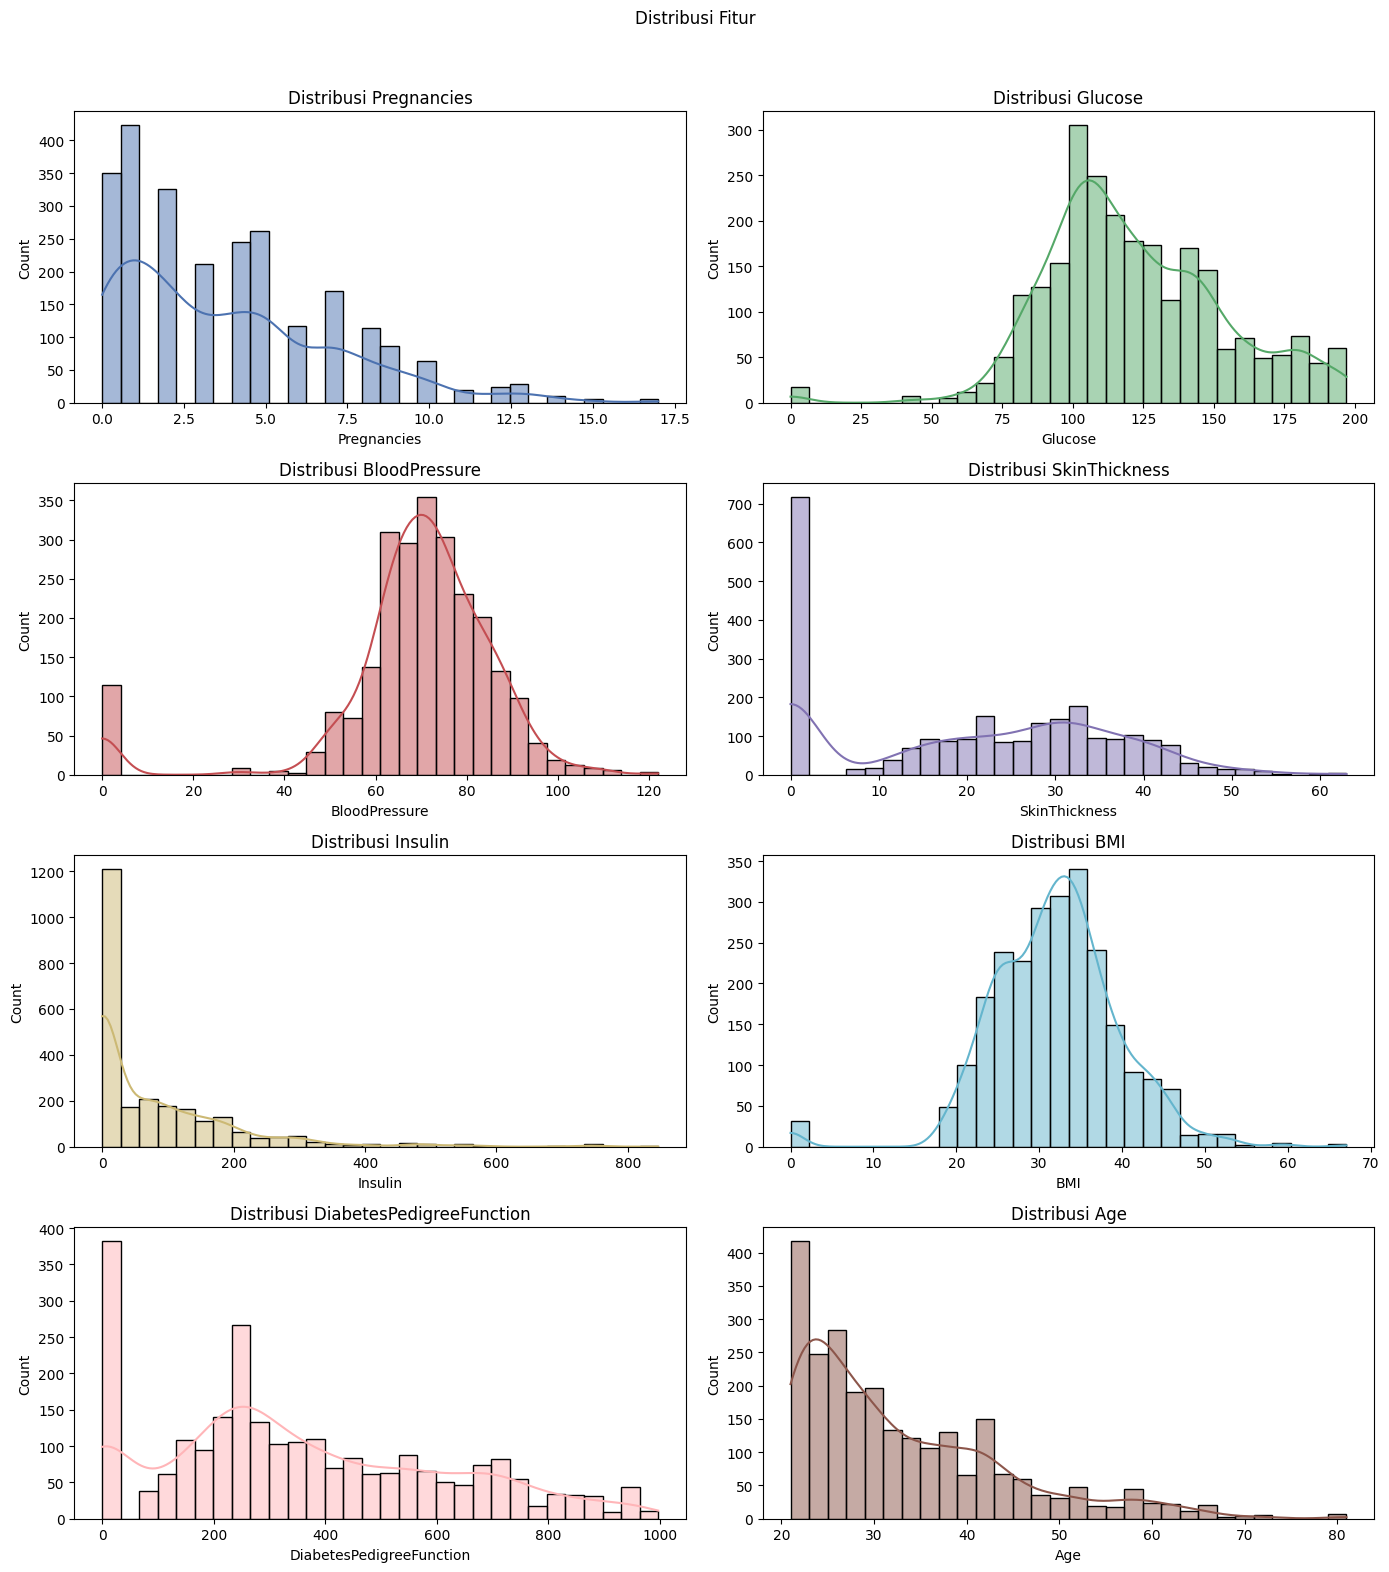

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Informasi awal tentang dataset
df_info = df.info()
df_head = df.head()

# Warna untuk setiap fitur (bisa diubah sesuai preferensi)
colors = ["#4C72B0", "#55A868", "#C44E52", "#8172B2", "#CCB974", "#64B5CD", "#FFB5B8", "#8C564B"]

# Mengecek distribusi awal dari setiap fitur
fig, axes = plt.subplots(4, 2, figsize=(14, 16))
fig.suptitle("Distribusi Fitur")

for idx, kolom in enumerate(df.columns[:-1]):  # Kecuali kolom 'Outcome'
    sns.histplot(df[kolom], bins=30, ax=axes[idx//2, idx%2], kde=True, color=colors[idx])
    axes[idx//2, idx%2].set_title(f"Distribusi {kolom}")

plt.tight_layout(rect=[0, 0, 1, 0.96])

# Mengecek jumlah nilai nol di setiap kolom
nilai_nol = (df == 0).sum()

df_info, df_head, nilai_nol

1. Pregnancies: Sebagian besar pasien memiliki jumlah kehamilan yang rendah (0-3 kali), sehingga jumlah kehamilan yang tinggi relatif jarang.

2. Glucose: Distribusi glukosa mendekati normal dengan puncak di sekitar 100-125. Ini mengindikasikan bahwa sebagian besar pasien memiliki kadar glukosa dalam kisaran normal hingga sedikit tinggi, yang mungkin menjadi faktor penting dalam menentukan risiko diabetes.

3. BloodPressure: Sebagian besar pasien memiliki tekanan darah sekitar 70-80. Ini menunjukkan adanya distribusi normal yang mungkin mencerminkan sampel populasi umum, tetapi beberapa nilai ekstrem juga terlihat yang bisa relevan bagi risiko kesehatan.

4. SkinThickness: Banyak pasien memiliki nilai ketebalan kulit mendekati 0, yang mungkin menandakan adanya data yang hilang atau abnormal. Mayoritas nilai ketebalan kulit berada di sekitar 20-40, yang dapat menjadi indikator penting dalam analisis kesehatan.

5. Insulin: Distribusi insulin sangat miring ke kiri, dengan banyak pasien memiliki kadar insulin rendah atau bahkan nol. Hal ini mungkin menunjukkan adanya data yang hilang atau distribusi yang tidak normal, sehingga fitur ini memerlukan perhatian khusus dalam analisis.

6. BMI: Distribusi BMI mendekati normal dengan puncak di sekitar 30, yang menunjukkan bahwa sebagian besar pasien berada dalam kategori kelebihan berat badan hingga obesitas. Hal ini penting karena BMI yang tinggi sering dikaitkan dengan risiko diabetes.

7. DiabetesPedigreeFunction: Distribusi faktor keturunan diabetes menunjukkan variasi besar antar pasien, yang mencerminkan pengaruh genetik yang beragam dalam dataset ini.

8. Age: Sebagian besar pasien berada di rentang usia 20-50 tahun, yang menunjukkan bahwa data ini mungkin terutama berfokus pada populasi dewasa hingga paruh baya.

Kesimpulan Utama:
Dataset ini menunjukkan variasi dalam berbagai fitur yang relevan dengan kesehatan, khususnya yang terkait dengan risiko diabetes, seperti kadar glukosa, tekanan darah, BMI, dan faktor keturunan. Beberapa fitur, seperti insulin dan ketebalan kulit, memiliki distribusi yang tidak normal, yang mungkin menunjukkan adanya data yang hilang atau distribusi yang perlu diperhatikan lebih lanjut. Distribusi ini bisa menjadi dasar untuk analisis lebih mendalam dalam model prediksi diabetes.

Dari hasil EDA dan pengecekan data, ditemukan bahwa:

Fitur yang memiliki nilai nol (kemungkinan nilai tidak valid):
- SkinThickness (717 nilai nol),
- Insulin (1181 nilai nol),
- BloodPressure (114 nilai nol),
- BMI (31 nilai nol).

Nilai-nilai nol ini mungkin perlu diimputasi agar analisis lebih akurat. Selanjutnya, kita akan mengganti nilai nol ini dengan median kolom masing-masing.

# **PERMODELAN**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Membagi data menjadi fitur dan target
X = df.drop(columns="Outcome")
y = df["Outcome"]

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inisialisasi model
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
nb = GaussianNB()

# Fungsi untuk melatih, memprediksi, dan menyimpan hasil
def evaluasi_model(model, nama_model):
    model.fit(X_train, y_train)
    prediksi = model.predict(X_test)
    akurasi = accuracy_score(y_test, prediksi)
    recall = recall_score(y_test, prediksi)
    presisi = precision_score(y_test, prediksi)
    return [nama_model, akurasi, recall, presisi]

# Evaluasi tiap model
hasil_knn = evaluasi_model(knn, "KNN")
hasil_dt = evaluasi_model(dt, "Decision Tree")
hasil_nb = evaluasi_model(nb, "Naive Bayes")

# Menampilkan Hasil
hasil = pd.DataFrame([hasil_knn, hasil_dt, hasil_nb], columns=["Model", "Akurasi", "Recall", "Presisi"])
hasil

,Model,Akurasi,Recall,Presisi
0,KNN,0.909214,0.882353,0.885417
1,Decision Tree,0.998645,0.996540,1.000000
2,Naive Bayes,0.722222,0.612457,0.655556


Selanjutnya, membagi data menjadi set pelatihan dan pengujian, lalu melatih model KNN, Decision Tree, dan Naive Bayes. Setelah itu, mengevaluasi hasilnya menggunakan metrik akurasi, recall, dan presisi.

Hasil evaluasi untuk masing-masing model adalah sebagai berikut:

KNN:

Akurasi: 0.909214
Recall: 0.882353
Presisi: 0.885417

Decision Tree:

Akurasi: 0.998645
Recall: 0.996540
Presisi: 1.000000

Naive Bayes:

Akurasi: 0.722222
Recall: 0.612457
Presisi: 0.655556

Kesimpulan
Model Decision Tree memiliki performa terbaik berdasarkan akurasi, recall, dan presisi yang sangat tinggi dibandingkan dengan KNN dan Naive Bayes. Dengan demikian, model Decision Tree lebih direkomendasikan untuk klasifikasi pada dataset ini.